# Project description

This report comes to prioritize different hypotheses that may help boost revenue.

In order to so we will launch an A/B test, and analyze the results.

# Description of the data

hypotheses table

•	Hypotheses — brief descriptions of the hypotheses

•	Reach — user reach, on a scale of one to ten

•	Impact — impact on users, on a scale of one to ten

•	Confidence — confidence in the hypothesis, on a scale of one to ten

•	Effort — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more   
    resource-intensive the test.

orders table

•	transactionId — order identifier

•	visitorId — identifier of the user who placed the order

•	date — of the order

•	revenue — from the order

•	group — the A/B test group that the user belongs to

visits table

•	date — date

•	group — A/B test group

•	visits — the number of visits on the date specified in the A/B test group specified


In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import numpy as np
import scipy.stats as stats
from pandas.plotting import scatter_matrix
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import datetime as dt
import math 

In [2]:
try:
    visits = pd.read_csv('C:/Users/ASUS/OneDrive/Desktop/projcts files/visits_us.csv')
    orders = pd.read_csv('C:/Users/ASUS/OneDrive/Desktop/projcts files/orders_us.csv')
    hypo = pd.read_csv('C:/Users/ASUS/OneDrive/Desktop/projcts files/hypotheses_us.csv',sep=';')
    
    
except:
    visits = pd.read_csv('/datasets/visits_us.csv') 
    orders = pd.read_csv('/datasets/orders_us.csv')
    hypo = pd.read_csv('/datasets/hypotheses_us.csv',sep=';')

In [3]:
visits.info()
orders.info()
hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypoth

In [4]:
visits.isnull().sum()
orders.isnull().sum()
hypo.isnull().sum()

date      0
group     0
visits    0
dtype: int64

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64

#### Preprocess the data 

deleting the duplicated visitors id in A/B testing groups.

changing the date columns into date time object.

In [5]:
orders_new = orders[['visitorId','group']].drop_duplicates()
orders['visitorId']=orders_new['visitorId']
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1089 non-null   float64
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 46.9+ KB


In [6]:
visits['date'] =visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

# Prioritizing Hypotheses 

In [7]:
hypo['ICE']=hypo['Impact']*hypo['Confidence']/hypo['Effort']
hypo[['Hypothesis','ICE']].sort_values(by='ICE',ascending=False)
pd.options.display.max_colwidth = 210

,Hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


In [8]:
hypo['RICE']=hypo['Reach']*hypo['Impact']*hypo['Confidence']/hypo['Effort']
hypo[['Hypothesis','RICE']].sort_values(by='RICE',ascending=False)
pd.options.display.max_colwidth = 210

,Hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


# Prioritizing Hypotheses conclusion 

We can see that on the ICE method the "Launch a promotion that gives users discounts" hypothesis is the first priority.
the prioritization of hypotheses changes when we use RICE instead of ICE.

The "Add a subscription form to all the main pages" Hypothesis gets the first priority. that because in RICE method we add the reach factor that take account the important subject of how we reach the user in our Hypothesis what make the defining of the priority of our Hypotheses more accurate .

#  A/B Test Analysis 

In [9]:
# building an array with unique paired date-group values
datesGroups = orders[['date','group']].drop_duplicates()

# getting aggregated cumulative daily data on orders 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# getting aggregated cumulative daily data on visitors  
visitsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

# merging the two tables into one and giving its columns descriptive names
cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visits
0 2019-08-01     A      24      20   2356.8     719
1 2019-08-01     B      21      20   1620.0     713
2 2019-08-02     A      44      38   3860.3    1338
3 2019-08-02     B      45      43   4243.8    1294
4 2019-08-03     A      68      62   5675.5    1845


#### Cumulative revenue by group

We can see from the graph of cumulative revenue that on the first days of the test the cumulative revenue of the two groups was quite similar, but after around 2 weeks the B group cumulative revenue start to get ahead and the spacious between the groups start to stabilize.

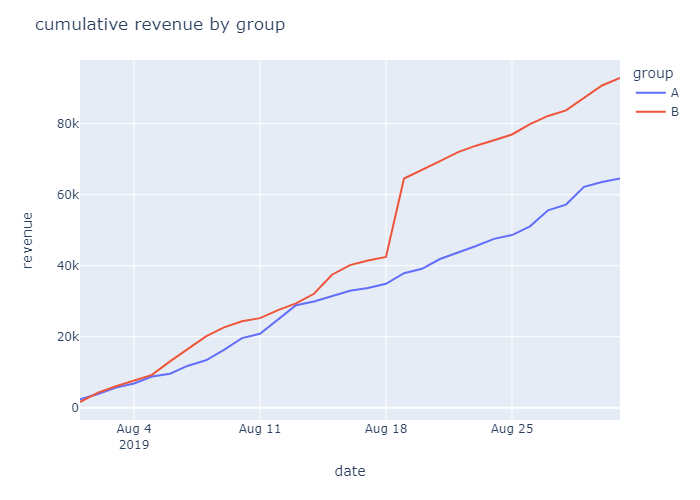

In [10]:
fig = px.line(cumulativeData, x="date", y="revenue",color='group')
fig.update_layout(title='cumulative revenue by group',
                   xaxis_title='date',
                   yaxis_title='revenue')
fig.show("png");

#### Cumulative average order size by group
We can see from the graph of cumulative average order size that on the first days of the test the cumulative order size of the two groups was unstable with a lot of ups and downs. 

After 19 days there was a big jump on the average orders size on group B and from then it got steady with higher avg of order size on group B.

In [11]:
cumulativeData['purchase size']=cumulativeData['revenue']/cumulativeData['orders']

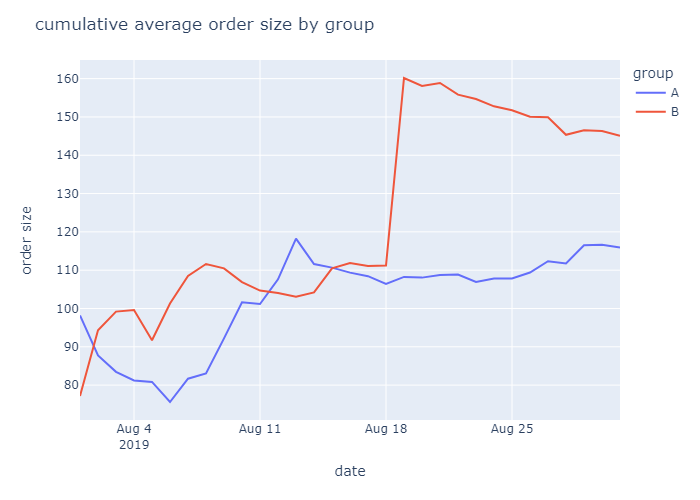

In [12]:
fig = px.line(cumulativeData, x="date", y="purchase size",color='group')
fig.update_layout(title='cumulative average order size by group',
                   xaxis_title='date',
                   yaxis_title='order size')
fig.show("png");

#### Relative difference in cumulative average order size for group B compared with group A

When we check the cumulative average order size for group B compared with group A,  we can see on the graph below that there was alot of movements with two peaks low one on 13/8 and high one on the 19/8. 

We can see that the around the 16/8 its start to climb up until the peak of the 19/8 and then start to decrease by the day.

The peaks in the graph tells us that maybe some abnormal orders that affect our data. we can see  the  peak on the 19/8 is shown on each one of the graphs of cumulative average order size and revenue, maybe because of big orders on that day. 


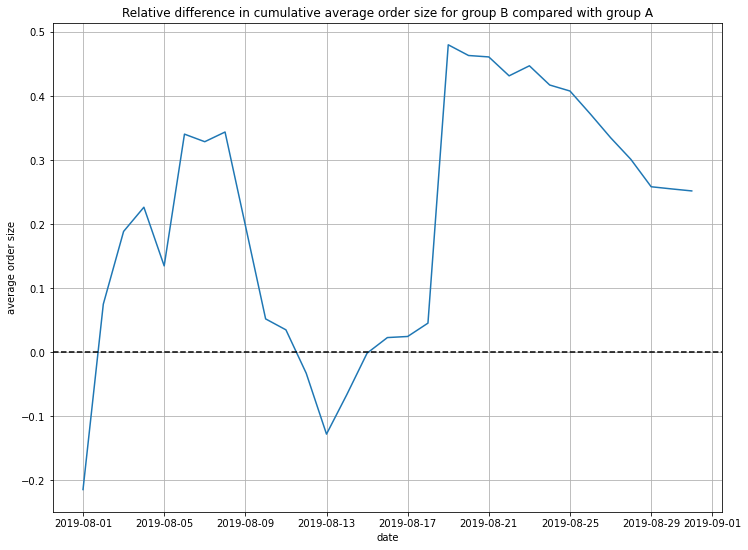

In [13]:
# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12, 9))
# plotting a relative difference graph for the average purchase sizes
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# adding the X axis
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Relative difference in cumulative average order size for group B compared with group A')
plt.xlabel('date')
plt.ylabel('average order size')
plt.grid()
plt.show();

#### Conversion rate  by group
we can see from the graph below that the conversion rates was unstable on the first week with alot of ups and downs on both groups. but after a week we can see clearly that the group B conversion rate is much higher.
from the graph of relative difference in cumulative conversion rate for group B compared with group A we can more clearly see how the conversion rate of group B gets higher then group A convertion rate from about a week after the start of the test.

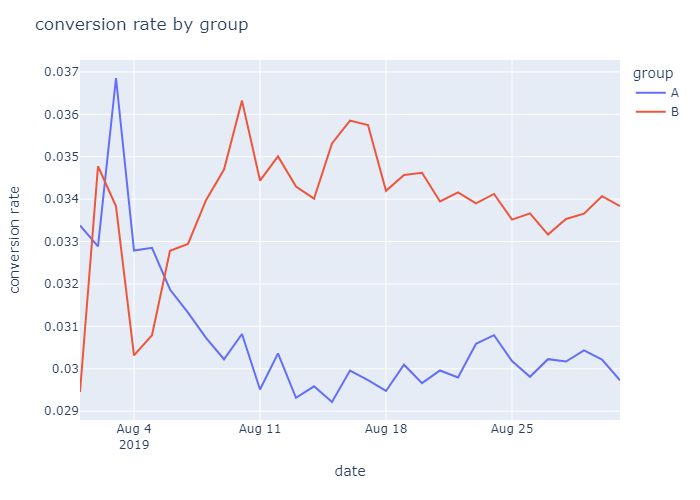

In [14]:
# calculating cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visits']
# plotting the graph
fig = px.line(cumulativeData, x="date", y="conversion",color='group')
fig.update_layout(title='conversion rate by group',
                   xaxis_title='date',
                   yaxis_title='conversion rate')
fig.show("png");


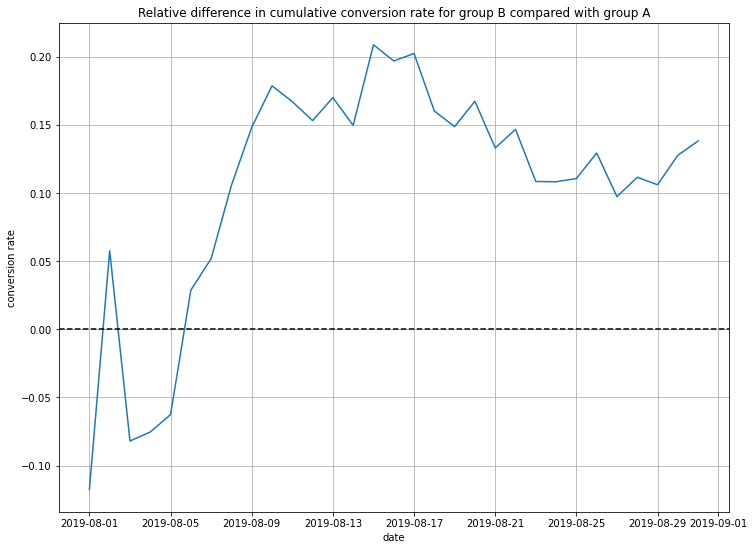

In [15]:
# DataFrame with cumulative orders and cumulative visits by day, group A
cumulativeconversionA = cumulativeData[cumulativeData['group']=='A'][['date','visits', 'orders']]

# DataFrame with cumulative orders and cumulative visits by day, group B
cumulativeconversionB = cumulativeData[cumulativeData['group']=='B'][['date','visits', 'orders']]

mergedCumulativeconversion = cumulativeconversionA.merge(cumulativeconversionB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12, 9))
# plotting a relative difference graph for the conversion rate
plt.plot(mergedCumulativeconversion['date'], (mergedCumulativeconversion['ordersB']/mergedCumulativeconversion['visitsB'])/(mergedCumulativeconversion['ordersA']/mergedCumulativeconversion['visitsA'])-1)

# adding the X axis
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Relative difference in cumulative conversion rate for group B compared with group A')
plt.xlabel('date')
plt.ylabel('conversion rate')
plt.grid()
plt.show();

#### Scatter chart of the number of orders per user

From the scatter chart we can see clearly that the order by user differ from mostly one order to two orders.

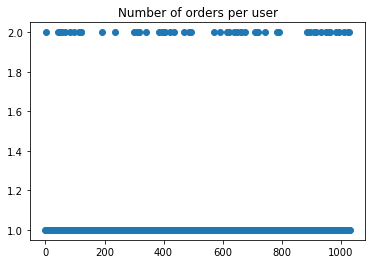

In [16]:
ordersByUsers = (
    orders.drop(['group','revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'orders']
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Number of orders per user')
plt.show();

#### The 95th and 99th percentiles for the number of orders per user

The precntile check back our data from the chart that 99% of the orders per user is 1 or 2 orders.

In [17]:
print('the 95th and 99th percentiles for the number of orders per user are:',np.percentile(ordersByUsers['orders'], [ 95, 99]))

the 95th and 99th percentiles for the number of orders per user are: [2. 2.]


#### Scatter chart of order prices

From the chart of order prices we can see there are few orders with abnormal order price that probbaly affect our calculations on the data.

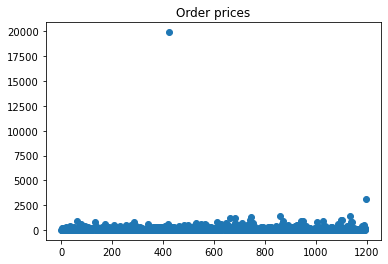

In [18]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Order prices')
plt.show();

#### The 95th, 97th and 99th percentiles of order prices

We can see that 95% of thr order prices are lower then 435.54 and 99% precent of the orders lower then 900.904. out of that we can see how abnormal is the the 19,920.4 order price. we can see the abnormal order was on the 19/08 what explain the peak on graphs of the cumulative average order size and revenue on that day. it on the group B what probbaly has affect on the data of this group.

In [19]:
print('the 95th and 99th percentiles for the order prices are:',np.percentile(orders['revenue'], [ 95,97, 99]))

the 95th and 99th percentiles for the order prices are: [435.54  550.9   900.904]


In [20]:
high_order=orders.query('revenue>19000')
high_order

,transactionId,visitorId,date,revenue,group
425,590470918,1.920143e+09,2019-08-19,19920.4,B


#### Statistical significance of the difference in conversion using the raw data

H0 (Null):my null hypothesis (H₀) is that the average conversion rate of group A and group B are equal.

H1 (Alternative):my alternative hypothesis, (H₁), is based on H₀. For this H₀, H₁ is that the average conversion rate of group A and group B are different.

I choose the Mann-Whitney statistical test because its nonparametric test method for A/B testing. in the data there are some big outliers, nonparametric methods are useful because they do not make assumptions about how the data is distributed, and i can use it when it's difficult to estimate parameters because of the outliers.

In [21]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 
alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB)[1]
print('p-value:', results)
if results < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")
print()
print("the relative conversion gain of group B is {0:.2f}".format((sampleB.mean()/sampleA.mean()-1)*100),'%') 

p-value: 0.016746169422850104
We reject the null hypothesis

the relative conversion gain of group B is 15.39 %


#### Statistical significance of the difference in conversion using the raw data conclusion

The Mann-Whitney Test gives us the p-value, 0.016, which is smaller than 0.05. So we reject the null hypothesis and can say there is statistically significant difference in conversion between the groups. out of it the relative conversion gain of group B is 15.39 %.

#### Statistical significance of the difference in average order size between the groups using the raw data 

H0 (Null):my null hypothesis (H₀) is that the average order size of group A and group B are equal.

H1 (Alternative):my alternative hypothesis, (H₁), is based on H₀. For this H₀, H₁ is that average order size of group A and group B are different.

In [22]:
result=stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
print('p-value:', result)

if result < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

print('the difference in order size of group B from group A is {0:.2f}'.format((orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)*100),'%') 

p-value: 0.6915246773264736
We can't reject the null hypothesis
the difference in order size of group B from group A is 25.17 %


#### Statistical significance of the difference in average order size between the groups using the raw data conclusion

The Mann-Whitney Test gives us the p-value of 0.69. The p-value is higher than 0.05, so there's no reason to reject the null hypothesis and conclude that average order size differs between the groups. what is intersting because the average order size for group B is much higher than it is for group A. myabe it out of abnormal orders size on the raw data.

#### Statistical significance of the difference in conversion between the groups using the filtered data

I decided to filter the data by the values of 2 number of orders by user (what equals to the 95th and 99th precntile) and revenue of 450 (what is a bit higher then the 95 precntile of the revenue data). because this will take out the anomalies that infulence the accuracy of our test result.

H0 (Null):my null hypothesis (H₀) is that the average conversion rate of group A and group B are equal, using the filtered data.

H1 (Alternative):my alternative hypothesis, (H₁), is based on H₀. For this H₀, H₁ is that the average conversion rate of group A and group B are different, using the filtered data.

In [23]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)

usersWithExpensiveOrders = orders[orders['revenue'] > 450]['visitorId']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

filter_result=stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
print('p-value:', filter_result)

if filter_result < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

print("the relative conversion gain of group B is {0:.2f}".format((sampleBFiltered.mean()/sampleAFiltered.mean()-1)*100),'%')  

p-value: 0.021001247584431698
We reject the null hypothesis
the relative conversion gain of group B is 15.24 %


#### Statistical significance of the difference in conversion between the groups using the filtered data conclusion

We can see that  the statistical tests on the filtered data gives us almost similiar results. 
The Mann-Whitney Test gives us the p-value of 0.021, which is smaller than 0.05. 
So we reject the null hypothesis and can say there is statistically significant difference in conversion between the groups. out of it the relative conversion gain of group B is 15.24%.


#### Statistical significance of the difference in average order size between the groups using the filtered data

H0 (Null):my null hypothesis (H₀) is that the average order size of group A and group B are equal, using the filtered data.

H1 (Alternative):my alternative hypothesis, (H₁), is based on H₀. For this H₀, H₁ is that average order size of group A and group B are different, using the filtered data.

In [24]:
rev_result=stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]
print('p-value:', rev_result)

if rev_result < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

    
print('the differnce in order size of group B from group A is {0:.2f}'.format((
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)*100),'%')

 

p-value: 0.8830942572107081
We can't reject the null hypothesis
the differnce in order size of group B from group A is -2.06 %


#### Statistical significance of the difference in average order size between the groups using the filtered data conclusion

The results of statistical significance of the difference in average order size between the groups using the filtered data gives us huge change. we can see that without the abnormal orders (mostly the big one on the 19/8) the average order size of group B became smaller then the average order size of group A.

The Mann-Whitney Test gives us the p-value of 0.88. The p-value is higher than 0.05, so there's no reason to reject the null hypothesis and conclude that average order size differs between the groups. but the average order size for group B is now smaller than average order size for group A.

# General conclusion: decision based on the test results

Out of the statistical tests we conclude, we can see that:

1. There's a statistically significant difference in conversion between the groups, according to both the raw and the filtered     data.

2. There was not any statistically significant difference according to both the raw  and the filtered data, between the groups    in terms of average purchase size, even after the anomalies were removed.
   
3. The graph of the difference in conversion between the groups shows that group B results are better than those of group A.      the conversion rates was unstable on the first week with alot of up and down on both groups. but after a week we can see        clearly that the group B conversion rate is much higher.

4. The graph of relative difference in cumulative average order size for group B compared with group A shows us that there was    alot of movements in the cumulative average order size with two peaks low one on 13/8 and high one on the 19/8. 
   we can see that around the 16/8 its start to climb up until the peak of the 19/8 and then start to decrease by the 
   day. 
   
5. We can see that the results of statistical significance of the difference in average order size between the groups using 
   the filtered data gives us huge change. we can see that without the abnormal orders (mostly the big one on the 19/8) the  
   average order size of group B became smaller then the average order size of group A. 
   this demonstrates clearly how the anomalies affected our data and the test result.
 
Based on the test results, we can not conclude final conclusion.

We can see the much higher conversion rate in group B with statistically significant difference, but the average order size of group B is decreasing. 

We can see that without the abnormal orders (mostly the big one on the 19/8) the average order size of group B became smaller then the average order size of group A.

Out of that i recommend to Continue the test for one more week to see if the average order size indeed keeps decreasing, and then we can say for sure the group B do not have better results then group A.

On the other hand if the average order size of group B stabilized and keeps to remain higher then group A, then we can say group B have better results. 

 